In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [4]:
df["Year"] = df.Year.str.replace(',', '')

In [5]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,"125,206"


In [6]:
df.describe()

,Amount (Million Naira)
count,7188.000000
mean,11.847999
std,25.318922
min,0.450000
25%,3.500000
50%,5.650000
75%,11.662500
max,456.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [8]:
df.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [9]:
# Handling the missing values

df['Year'].fillna((df['Year'].median()), inplace=True)

df['Amount (Million Naira)'].fillna((df['Amount (Million Naira)'].median()), inplace=True)

df['Type'].fillna(method='ffill', inplace=True)

df["Distance"] = df.Distance.str.replace(',', '')

df['Distance'].fillna((df['Distance'].median()), inplace=True)


In [10]:
df.isna().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [11]:
df['Distance'] = df.Distance.astype(float)
df['Year'] = df.Year.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                7205 non-null   float64
dtypes: float64(2), int32(1), object(6)
memory usage: 478.6+ KB


In [13]:
df.drop(['VehicleID','Location'], axis=1, inplace=True)

In [14]:
df.head()

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,80830.0
1,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0
2,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0
3,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0
4,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0


## MODELLING

In [15]:
categ_col = df.select_dtypes(include=['object', 'category']).columns

num_cols = [col for col in df.columns if col not in categ_col]
print(categ_col)

Index(['Maker', 'Model', 'Colour', 'Type'], dtype='object')


In [16]:
print(num_cols)

['Year', 'Amount (Million Naira)', 'Distance']


In [17]:
# label encoding (explain)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for i in categ_col:
    df[i] = le.fit_transform(df[i])

In [18]:
df.head()

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,17,117,2011,16,2.2,2,80830.0
1,19,1049,2012,16,3.5,2,125000.0
2,29,908,2010,15,9.2,1,110852.0
3,34,508,2017,2,22.8,1,30000.0
4,52,569,2002,15,2.6,2,125206.0


In [20]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
# splitting the data into X and y
x = df.drop('Amount (Million Naira)', axis = 1)
y = df['Amount (Million Naira)']

In [23]:
# splitting data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5764, 6), (5764,), (1441, 6), (1441,))

In [25]:
# putting models in a dictionary
models = {"XGBoost Regressor": XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Catboost": CatBoostRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression(),
         }

# setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: training data (no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)
    
    # making a dictionary to keep model scores
    model_scores = {}
    
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train, y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [26]:
%%time
scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
scores

Learning rate set to 0.053998
0:	learn: 24.3548574	total: 146ms	remaining: 2m 25s
1:	learn: 23.7273094	total: 153ms	remaining: 1m 16s
2:	learn: 23.1702016	total: 160ms	remaining: 53s
3:	learn: 22.5998034	total: 164ms	remaining: 40.9s
4:	learn: 22.0729039	total: 169ms	remaining: 33.6s
5:	learn: 21.5896351	total: 175ms	remaining: 28.9s
6:	learn: 21.1578760	total: 179ms	remaining: 25.4s
7:	learn: 20.7036019	total: 184ms	remaining: 22.8s
8:	learn: 20.3297402	total: 189ms	remaining: 20.8s
9:	learn: 19.9634334	total: 192ms	remaining: 19s
10:	learn: 19.5988025	total: 196ms	remaining: 17.6s
11:	learn: 19.2914077	total: 200ms	remaining: 16.4s
12:	learn: 18.9788321	total: 204ms	remaining: 15.5s
13:	learn: 18.6773854	total: 208ms	remaining: 14.7s
14:	learn: 18.4066661	total: 212ms	remaining: 13.9s
15:	learn: 18.1689555	total: 215ms	remaining: 13.2s
16:	learn: 17.8991048	total: 219ms	remaining: 12.7s
17:	learn: 17.6464212	total: 222ms	remaining: 12.1s
18:	learn: 17.4180626	total: 226ms	remaining: 

199:	learn: 9.0363696	total: 862ms	remaining: 3.45s
200:	learn: 9.0139988	total: 866ms	remaining: 3.44s
201:	learn: 9.0051609	total: 871ms	remaining: 3.44s
202:	learn: 8.9845368	total: 875ms	remaining: 3.44s
203:	learn: 8.9710512	total: 882ms	remaining: 3.44s
204:	learn: 8.9626163	total: 888ms	remaining: 3.44s
205:	learn: 8.9508943	total: 895ms	remaining: 3.45s
206:	learn: 8.9404195	total: 900ms	remaining: 3.45s
207:	learn: 8.9199709	total: 906ms	remaining: 3.45s
208:	learn: 8.9106551	total: 910ms	remaining: 3.44s
209:	learn: 8.8978774	total: 915ms	remaining: 3.44s
210:	learn: 8.8748492	total: 920ms	remaining: 3.44s
211:	learn: 8.8601942	total: 924ms	remaining: 3.44s
212:	learn: 8.8453923	total: 928ms	remaining: 3.43s
213:	learn: 8.8265128	total: 932ms	remaining: 3.42s
214:	learn: 8.8090923	total: 936ms	remaining: 3.42s
215:	learn: 8.8014111	total: 939ms	remaining: 3.41s
216:	learn: 8.7847051	total: 942ms	remaining: 3.4s
217:	learn: 8.7666115	total: 947ms	remaining: 3.4s
218:	learn: 8.

383:	learn: 7.1008820	total: 1.56s	remaining: 2.5s
384:	learn: 7.0950614	total: 1.57s	remaining: 2.5s
385:	learn: 7.0912006	total: 1.57s	remaining: 2.5s
386:	learn: 7.0704576	total: 1.57s	remaining: 2.49s
387:	learn: 7.0643698	total: 1.58s	remaining: 2.49s
388:	learn: 7.0586893	total: 1.58s	remaining: 2.48s
389:	learn: 7.0445163	total: 1.58s	remaining: 2.48s
390:	learn: 7.0408741	total: 1.59s	remaining: 2.47s
391:	learn: 7.0362414	total: 1.59s	remaining: 2.47s
392:	learn: 7.0289333	total: 1.59s	remaining: 2.46s
393:	learn: 7.0222439	total: 1.6s	remaining: 2.46s
394:	learn: 7.0185660	total: 1.6s	remaining: 2.45s
395:	learn: 7.0138480	total: 1.6s	remaining: 2.45s
396:	learn: 7.0083997	total: 1.61s	remaining: 2.44s
397:	learn: 7.0026888	total: 1.61s	remaining: 2.44s
398:	learn: 6.9974032	total: 1.61s	remaining: 2.43s
399:	learn: 6.9810581	total: 1.62s	remaining: 2.43s
400:	learn: 6.9728809	total: 1.62s	remaining: 2.42s
401:	learn: 6.9650572	total: 1.62s	remaining: 2.42s
402:	learn: 6.9495

585:	learn: 5.7948079	total: 2.25s	remaining: 1.59s
586:	learn: 5.7910864	total: 2.26s	remaining: 1.59s
587:	learn: 5.7885308	total: 2.26s	remaining: 1.58s
588:	learn: 5.7863906	total: 2.27s	remaining: 1.58s
589:	learn: 5.7778304	total: 2.27s	remaining: 1.58s
590:	learn: 5.7733761	total: 2.27s	remaining: 1.57s
591:	learn: 5.7669240	total: 2.28s	remaining: 1.57s
592:	learn: 5.7587045	total: 2.28s	remaining: 1.57s
593:	learn: 5.7500185	total: 2.29s	remaining: 1.56s
594:	learn: 5.7452826	total: 2.29s	remaining: 1.56s
595:	learn: 5.7344133	total: 2.29s	remaining: 1.55s
596:	learn: 5.7317889	total: 2.3s	remaining: 1.55s
597:	learn: 5.7256959	total: 2.3s	remaining: 1.54s
598:	learn: 5.7235982	total: 2.3s	remaining: 1.54s
599:	learn: 5.7157996	total: 2.31s	remaining: 1.54s
600:	learn: 5.7137272	total: 2.31s	remaining: 1.53s
601:	learn: 5.7086049	total: 2.31s	remaining: 1.53s
602:	learn: 5.7031686	total: 2.32s	remaining: 1.52s
603:	learn: 5.6956598	total: 2.32s	remaining: 1.52s
604:	learn: 5.6

781:	learn: 4.9567401	total: 2.93s	remaining: 816ms
782:	learn: 4.9535827	total: 2.93s	remaining: 813ms
783:	learn: 4.9483386	total: 2.94s	remaining: 809ms
784:	learn: 4.9454339	total: 2.94s	remaining: 805ms
785:	learn: 4.9415946	total: 2.94s	remaining: 802ms
786:	learn: 4.9395055	total: 2.95s	remaining: 798ms
787:	learn: 4.9370763	total: 2.95s	remaining: 794ms
788:	learn: 4.9332890	total: 2.96s	remaining: 790ms
789:	learn: 4.9263647	total: 2.96s	remaining: 787ms
790:	learn: 4.9242959	total: 2.96s	remaining: 783ms
791:	learn: 4.9190288	total: 2.97s	remaining: 779ms
792:	learn: 4.9161609	total: 2.97s	remaining: 775ms
793:	learn: 4.9144808	total: 2.97s	remaining: 771ms
794:	learn: 4.9119219	total: 2.98s	remaining: 768ms
795:	learn: 4.9089581	total: 2.98s	remaining: 764ms
796:	learn: 4.9068185	total: 2.98s	remaining: 760ms
797:	learn: 4.9053489	total: 2.99s	remaining: 756ms
798:	learn: 4.9011296	total: 2.99s	remaining: 752ms
799:	learn: 4.8988449	total: 2.99s	remaining: 748ms
800:	learn: 

985:	learn: 4.3149579	total: 3.63s	remaining: 51.6ms
986:	learn: 4.3114290	total: 3.63s	remaining: 47.9ms
987:	learn: 4.3102658	total: 3.64s	remaining: 44.2ms
988:	learn: 4.3079754	total: 3.64s	remaining: 40.5ms
989:	learn: 4.3050772	total: 3.65s	remaining: 36.8ms
990:	learn: 4.3032839	total: 3.65s	remaining: 33.1ms
991:	learn: 4.3024751	total: 3.65s	remaining: 29.5ms
992:	learn: 4.3000091	total: 3.65s	remaining: 25.8ms
993:	learn: 4.2975988	total: 3.66s	remaining: 22.1ms
994:	learn: 4.2952607	total: 3.66s	remaining: 18.4ms
995:	learn: 4.2929222	total: 3.67s	remaining: 14.7ms
996:	learn: 4.2919468	total: 3.67s	remaining: 11ms
997:	learn: 4.2903362	total: 3.67s	remaining: 7.36ms
998:	learn: 4.2879472	total: 3.68s	remaining: 3.68ms
999:	learn: 4.2840450	total: 3.68s	remaining: 0us
Wall time: 15.1 s


{'XGBoost Regressor': 0.884817027988975,
 'DecisionTree Regressor': 0.7184146464132379,
 'Random Forest': 0.81463971595955,
 'Catboost': 0.89425726778697,
 'gradientboosting': 0.8542037686750275,
 'KNeighborsRegressor': 0.5591441079687274,
 'Ridge': 0.22120599776521743,
 'SVR': 0.05190319571253654,
 'LinearRegression': 0.2212079668411353}

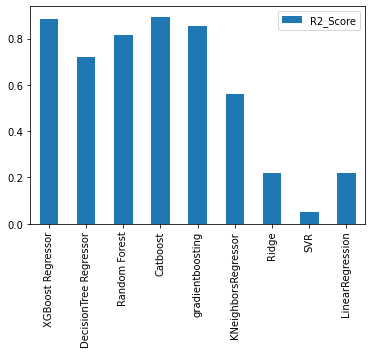

In [27]:
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar();# T means transpose, so as to improve the plot

In [28]:
%%time
cbt_model = CatBoostRegressor()

cbt_model.fit(x_train, y_train)

Learning rate set to 0.053998
0:	learn: 24.3548574	total: 7.82ms	remaining: 7.81s
1:	learn: 23.7273094	total: 15ms	remaining: 7.47s
2:	learn: 23.1702016	total: 23.1ms	remaining: 7.69s
3:	learn: 22.5998034	total: 31.3ms	remaining: 7.8s
4:	learn: 22.0729039	total: 36.5ms	remaining: 7.26s
5:	learn: 21.5896351	total: 40.8ms	remaining: 6.76s
6:	learn: 21.1578760	total: 45ms	remaining: 6.39s
7:	learn: 20.7036019	total: 49.7ms	remaining: 6.17s
8:	learn: 20.3297402	total: 54.1ms	remaining: 5.95s
9:	learn: 19.9634334	total: 58.4ms	remaining: 5.78s
10:	learn: 19.5988025	total: 62.6ms	remaining: 5.63s
11:	learn: 19.2914077	total: 66.3ms	remaining: 5.46s
12:	learn: 18.9788321	total: 69.9ms	remaining: 5.31s
13:	learn: 18.6773854	total: 73.5ms	remaining: 5.18s
14:	learn: 18.4066661	total: 77.1ms	remaining: 5.06s
15:	learn: 18.1689555	total: 80.7ms	remaining: 4.96s
16:	learn: 17.8991048	total: 84.3ms	remaining: 4.87s
17:	learn: 17.6464212	total: 87.9ms	remaining: 4.8s
18:	learn: 17.4180626	total: 91.

185:	learn: 9.3043092	total: 684ms	remaining: 2.99s
186:	learn: 9.2777756	total: 688ms	remaining: 2.99s
187:	learn: 9.2595144	total: 691ms	remaining: 2.98s
188:	learn: 9.2372871	total: 695ms	remaining: 2.98s
189:	learn: 9.2131158	total: 698ms	remaining: 2.98s
190:	learn: 9.1915761	total: 702ms	remaining: 2.97s
191:	learn: 9.1742061	total: 706ms	remaining: 2.97s
192:	learn: 9.1542269	total: 710ms	remaining: 2.97s
193:	learn: 9.1393244	total: 713ms	remaining: 2.96s
194:	learn: 9.1170260	total: 717ms	remaining: 2.96s
195:	learn: 9.0955610	total: 721ms	remaining: 2.96s
196:	learn: 9.0798825	total: 725ms	remaining: 2.95s
197:	learn: 9.0651851	total: 728ms	remaining: 2.95s
198:	learn: 9.0475056	total: 731ms	remaining: 2.94s
199:	learn: 9.0363696	total: 735ms	remaining: 2.94s
200:	learn: 9.0139988	total: 738ms	remaining: 2.93s
201:	learn: 9.0051609	total: 741ms	remaining: 2.93s
202:	learn: 8.9845368	total: 745ms	remaining: 2.92s
203:	learn: 8.9710512	total: 748ms	remaining: 2.92s
204:	learn: 

381:	learn: 7.1139280	total: 1.38s	remaining: 2.23s
382:	learn: 7.1081906	total: 1.38s	remaining: 2.23s
383:	learn: 7.1008820	total: 1.39s	remaining: 2.22s
384:	learn: 7.0950614	total: 1.39s	remaining: 2.22s
385:	learn: 7.0912006	total: 1.39s	remaining: 2.21s
386:	learn: 7.0704576	total: 1.4s	remaining: 2.21s
387:	learn: 7.0643698	total: 1.4s	remaining: 2.21s
388:	learn: 7.0586893	total: 1.4s	remaining: 2.21s
389:	learn: 7.0445163	total: 1.41s	remaining: 2.2s
390:	learn: 7.0408741	total: 1.41s	remaining: 2.2s
391:	learn: 7.0362414	total: 1.42s	remaining: 2.19s
392:	learn: 7.0289333	total: 1.42s	remaining: 2.19s
393:	learn: 7.0222439	total: 1.42s	remaining: 2.19s
394:	learn: 7.0185660	total: 1.43s	remaining: 2.18s
395:	learn: 7.0138480	total: 1.43s	remaining: 2.18s
396:	learn: 7.0083997	total: 1.43s	remaining: 2.17s
397:	learn: 7.0026888	total: 1.44s	remaining: 2.17s
398:	learn: 6.9974032	total: 1.44s	remaining: 2.17s
399:	learn: 6.9810581	total: 1.44s	remaining: 2.16s
400:	learn: 6.972

582:	learn: 5.8089804	total: 2.07s	remaining: 1.48s
583:	learn: 5.8014531	total: 2.08s	remaining: 1.48s
584:	learn: 5.8003449	total: 2.08s	remaining: 1.48s
585:	learn: 5.7948079	total: 2.08s	remaining: 1.47s
586:	learn: 5.7910864	total: 2.09s	remaining: 1.47s
587:	learn: 5.7885308	total: 2.09s	remaining: 1.47s
588:	learn: 5.7863906	total: 2.1s	remaining: 1.46s
589:	learn: 5.7778304	total: 2.1s	remaining: 1.46s
590:	learn: 5.7733761	total: 2.1s	remaining: 1.46s
591:	learn: 5.7669240	total: 2.11s	remaining: 1.45s
592:	learn: 5.7587045	total: 2.11s	remaining: 1.45s
593:	learn: 5.7500185	total: 2.11s	remaining: 1.44s
594:	learn: 5.7452826	total: 2.12s	remaining: 1.44s
595:	learn: 5.7344133	total: 2.12s	remaining: 1.44s
596:	learn: 5.7317889	total: 2.12s	remaining: 1.43s
597:	learn: 5.7256959	total: 2.13s	remaining: 1.43s
598:	learn: 5.7235982	total: 2.13s	remaining: 1.43s
599:	learn: 5.7157996	total: 2.13s	remaining: 1.42s
600:	learn: 5.7137272	total: 2.14s	remaining: 1.42s
601:	learn: 5.7

784:	learn: 4.9454339	total: 2.77s	remaining: 758ms
785:	learn: 4.9415946	total: 2.77s	remaining: 755ms
786:	learn: 4.9395055	total: 2.77s	remaining: 751ms
787:	learn: 4.9370763	total: 2.78s	remaining: 748ms
788:	learn: 4.9332890	total: 2.78s	remaining: 744ms
789:	learn: 4.9263647	total: 2.79s	remaining: 741ms
790:	learn: 4.9242959	total: 2.79s	remaining: 737ms
791:	learn: 4.9190288	total: 2.79s	remaining: 734ms
792:	learn: 4.9161609	total: 2.8s	remaining: 731ms
793:	learn: 4.9144808	total: 2.8s	remaining: 728ms
794:	learn: 4.9119219	total: 2.81s	remaining: 724ms
795:	learn: 4.9089581	total: 2.81s	remaining: 721ms
796:	learn: 4.9068185	total: 2.81s	remaining: 717ms
797:	learn: 4.9053489	total: 2.82s	remaining: 714ms
798:	learn: 4.9011296	total: 2.82s	remaining: 710ms
799:	learn: 4.8988449	total: 2.83s	remaining: 706ms
800:	learn: 4.8966361	total: 2.83s	remaining: 703ms
801:	learn: 4.8906831	total: 2.83s	remaining: 699ms
802:	learn: 4.8885198	total: 2.84s	remaining: 696ms
803:	learn: 4.

979:	learn: 4.3311344	total: 3.46s	remaining: 70.6ms
980:	learn: 4.3278289	total: 3.46s	remaining: 67ms
981:	learn: 4.3250721	total: 3.46s	remaining: 63.5ms
982:	learn: 4.3221861	total: 3.47s	remaining: 60ms
983:	learn: 4.3196066	total: 3.47s	remaining: 56.5ms
984:	learn: 4.3169058	total: 3.48s	remaining: 52.9ms
985:	learn: 4.3149579	total: 3.48s	remaining: 49.4ms
986:	learn: 4.3114290	total: 3.48s	remaining: 45.9ms
987:	learn: 4.3102658	total: 3.49s	remaining: 42.4ms
988:	learn: 4.3079754	total: 3.49s	remaining: 38.8ms
989:	learn: 4.3050772	total: 3.49s	remaining: 35.3ms
990:	learn: 4.3032839	total: 3.5s	remaining: 31.8ms
991:	learn: 4.3024751	total: 3.5s	remaining: 28.2ms
992:	learn: 4.3000091	total: 3.5s	remaining: 24.7ms
993:	learn: 4.2975988	total: 3.51s	remaining: 21.2ms
994:	learn: 4.2952607	total: 3.51s	remaining: 17.6ms
995:	learn: 4.2929222	total: 3.51s	remaining: 14.1ms
996:	learn: 4.2919468	total: 3.52s	remaining: 10.6ms
997:	learn: 4.2903362	total: 3.52s	remaining: 7.06ms


In [29]:
cbt_model.score(x_test, y_test)

0.89425726778697

In [30]:
# making predictions
y_preds = cbt_model.predict(x_test)
y_preds

array([ 8.14612526, 11.61828667, 50.46700965, ...,  1.73783662,
        8.81311366,  4.69141303])

## Regression model evaluation metrics

R^2 (pronounced r-squared) or coefficient of determination - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [31]:
mse = mean_squared_error(y_test, y_preds)
mse

74.66636313054269

In [32]:
np.sqrt(mse)

8.640970034119011

In [33]:
mae = mean_absolute_error(y_test, y_preds)
mae

2.9119757137643303

Our model achieves an MAE of  This means, on average our models predictions are  units away from the actual value.

Let's make it a little more visual.

In [34]:
df2 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df2

,actual values,predictions
3252,6.50,8.146125
1535,16.00,11.618287
6337,56.00,50.467010
177,2.59,3.434963
230,25.00,23.514944
...,...,...
5230,18.00,27.183761
6476,7.40,7.112217
4949,2.00,1.737837
1886,3.90,8.813114


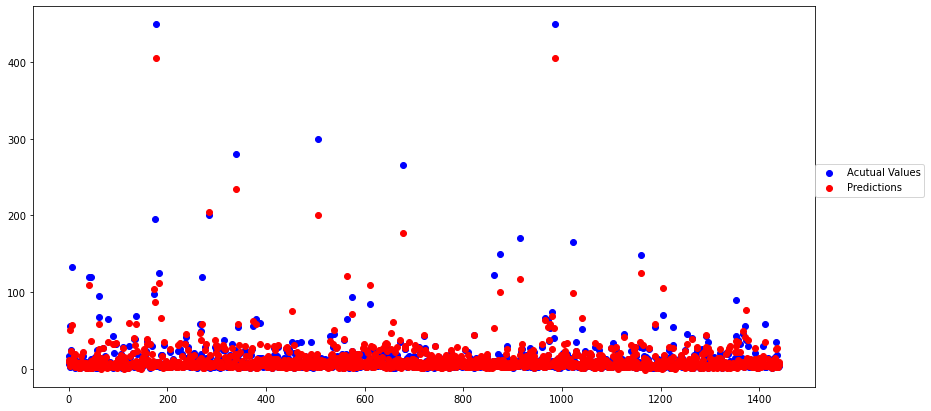

In [35]:
fig, ax = plt.subplots(figsize = (14,7))
x = np.arange(0, len(df2), 1)
ax.scatter(x, df2["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df2["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [36]:
cbt_model.feature_importances_

array([26.62376454, 25.09268382, 29.40275395,  3.90832773, 11.42683126,
        3.54563871])

In [37]:
# creating a function for visualing the feature importances

def plot_importances(columns, importances, n=20):
    df6 = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                       .sort_values('feature_importances', ascending=False)
                       .reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = 'feature_importances', y = 'features', data = df6[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

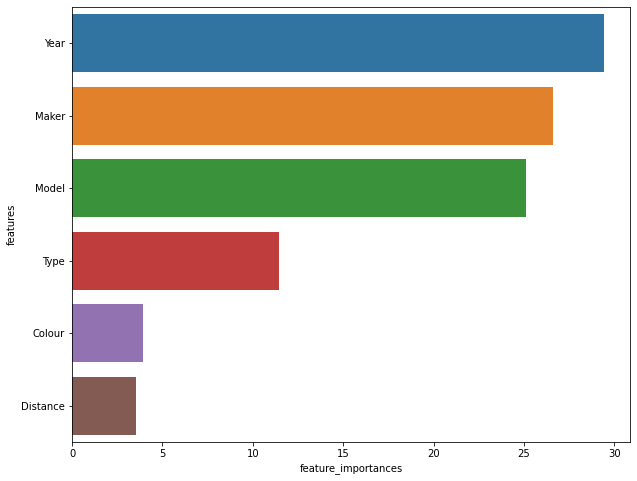

In [38]:
plot_importances(x_train.columns, cbt_model.feature_importances_)